# Updating data frames

We will go over methods for updating a `pandas.DataFrame` using Palmer penguins.

## Adding a single column...

Start by importing packages and data.

In [1]:
import numpy as np
import pandas as pd
import random # Used for randomly sampling integers

# Set the seed
random.seed(42)
# sets the seed for your notebook

# Import data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## ... using dictionary-like syntax

Simplest way to add a new column to a `pd.DataFrame`:
```
df['new_col_name'] = new_column_values
```

If the column name exists, then the existing column will be updated.
This syntax is the same as adding a new key-value pair to a dictionary:
```
df[new_key] = new_value
```

### Example

Create a new column where the body mass is in kg instead of grams. 

In [3]:
# Add a new column body_mass_kg
penguins['body_mass_kg'] = penguins['body_mass_g']/1000

# Confirm the new column is the data frame
print('body_mass_kg' in penguins.columns)

# Look at the new column
penguins.head()

True


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.45


## using the `assign()` method

We can also create or update an existing column using `assign()`:
```
df = df.assign(new_col_name = new_col_values)
```

Notice: column names are not strings, we declare them as if we were creating variables.
It doesn't modify things in place, this can be useful for chaining operations:

<AxesSubplot:xlabel='bill_length_cm', ylabel='body_mass_g'>

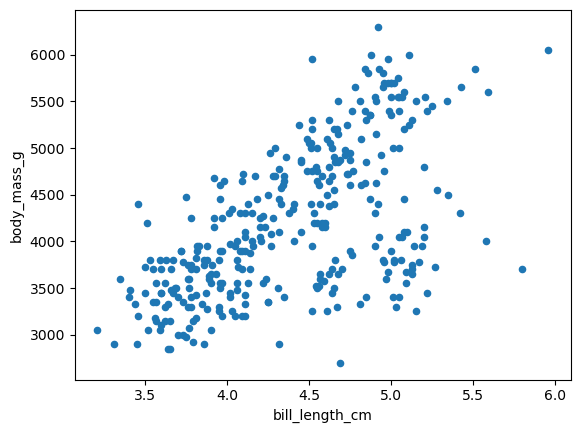

In [4]:
(penguins.assign(bill_length_cm=penguins['bill_length_mm']/10)
 .plot(kind='scatter',
     x='bill_length_cm',
     y='body_mass_g'))

In [5]:
# Notice the bill_length_mm column was not added to the df
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.45


## at a specific location

The new column was added by default at the end of the data frame.
If we want to create a new column and insert in a particular position we can use the data frame method `insert()`:

### Example
Give each penguin observation a unique identifier as a three digit number, add this column at the beginning of the data frame:

In [6]:
# Create a unique random 3-digit codes
codes = random.sample(range(100,1000),len(penguins)) # Sampling without replacement

# Insert codes at the front of the dataframe
penguins.insert(loc=0, # index
               column='id_code', # new column name
               value=codes)

In [7]:
penguins.head()

,id_code,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
0,754,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75
1,214,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80
2,125,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25
3,859,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,381,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.45


## Adding multiple columns

Use `assign()` to create or update mulitple columns in the same call:
```
df = df.assign(new_col1_name=new_col1_values,
new_col2_name=new_col2_values)
```

### Example 

We want to add these new columns:
- flipper length converted from mm to cm
- a code representing the observer

In [8]:
# Create columns with observer codes and flipper length in cm
penguins = penguins.assign(flipper_length_cm=penguins['flipper_length_mm']/10,
                          observer=random.choices(['A','B','C'], k=len(penguins)))

# Examine the result
penguins.head()

,id_code,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg,flipper_length_cm,observer
0,754,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75,18.1,C
1,214,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80,18.6,A
2,125,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25,19.5,C
3,859,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN,A
4,381,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.45,19.3,B


## Removing columns

Remove columns using the `drop()` method:
```
df=df.drop(column=col_names)
```
`col_names` can be a single column name (string) or a list of column names (each a string).

### Example

In [9]:
# Remove duplicate length and mass measurements
penguins = penguins.drop(columns=['flipper_length_mm','body_mass_g'])

# Confirm result
print(penguins.columns)

Index(['id_code', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'sex', 'year', 'body_mass_kg', 'flipper_length_cm', 'observer'],
      dtype='object')


## Updating values

Sometimes we want to update specific values in our data frame.

### A single value

Access a single value in a `pd.DataFrame` using the locators:

- `at[]` to select by labels,
- `iat[]` to select by position

The syntax for `at[]`:
```
df.at[single_value_index,'column_name']
```

Think of `at[]` as the equivalent of `loc[]` when we want to access a single value

### Example
First update the index of the dataframe to be the `id_column`

In [10]:
penguins=penguins.set_index('id_code')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,sex,year,body_mass_kg,flipper_length_cm,observer
id_code,,,,,,,,,
754,Adelie,Torgersen,39.1,18.7,male,2007,3.75,18.1,C
214,Adelie,Torgersen,39.5,17.4,female,2007,3.80,18.6,A
125,Adelie,Torgersen,40.3,18.0,female,2007,3.25,19.5,C
859,Adelie,Torgersen,NaN,NaN,NaN,2007,NaN,NaN,A
381,Adelie,Torgersen,36.7,19.3,female,2007,3.45,19.3,B


What was the bill length of the penguin with ID number 127?

In [11]:
# Check bill length of penguin with ID 127
penguins.at[127, 'bill_length_mm']

38.2

Update this value to 38.3 mm. We can also do this with `at[]`

In [12]:
# Correct bill length value for penguin with ID 127
penguins.at[127, 'bill_length_mm'] = 38.3

# Confirm that the value was updated
penguins.loc[127]

species              Adelie
island               Biscoe
bill_length_mm         38.3
bill_depth_mm          18.1
sex                    male
year                   2007
body_mass_kg           3.95
flipper_length_cm      18.5
observer                  B
Name: 127, dtype: object

If we want to access or update a single value by position, we use `iat[]` locator:

```
df.iat[index_integer_location,column_integer_location]
```

We can dynamically get the location of a single column this way:
```
df.columns.get_loc('column_name')
```

## Check-in
a. obtain the location of the 'bill_length_mm' column
b. use the `iat[]` to access the same bill length value for your penguin and revert it back to NA value. Confirm your update using `iloc[]`

In [13]:
# Revert to NA using iat
bill_length_index = penguins.columns.get_loc('bill_length_mm')

In [14]:
penguins.iat[3,bill_length_index] = np.nan

In [15]:
penguins.iloc[3]

species                 Adelie
island               Torgersen
bill_length_mm             NaN
bill_depth_mm              NaN
sex                        NaN
year                      2007
body_mass_kg               NaN
flipper_length_cm          NaN
observer                     A
Name: 859, dtype: object

## Update multiple values in a column

What if we want to update multiple values in a column?

### Using a condition

When we need to create a new column where the new values depend on conditions on another column

#### Example

We want to classify the penguins such that

- penguins with body mass < 3 kg are small
- penguins with 3 kg <= body mass < 5 kg are medium
- penguins with 5 kg <= body mass are large

We can add this info to a new column with `numpy.select()` function:

In [16]:
# Create a list with the conditions
conditions = [penguins.body_mass_kg < 3,
             (3 <= penguins.body_mass_kg) & (penguins.body_mass_kg < 5),
             5 <= penguins.body_mass_kg]

# Create a list with the choices
choices = ['small','medium','large']

# Add the selections using np.select
penguins['size'] = np.select(conditions,
                            choices,
                            default=np.nan) # value for anything outside conditions

# Display the updated data frame to confirm the new columns
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,sex,year,body_mass_kg,flipper_length_cm,observer,size
id_code,,,,,,,,,,
754,Adelie,Torgersen,39.1,18.7,male,2007,3.75,18.1,C,medium
214,Adelie,Torgersen,39.5,17.4,female,2007,3.80,18.6,A,medium
125,Adelie,Torgersen,40.3,18.0,female,2007,3.25,19.5,C,medium
859,Adelie,Torgersen,NaN,NaN,NaN,2007,NaN,NaN,A,nan
381,Adelie,Torgersen,36.7,19.3,female,2007,3.45,19.3,B,medium


## By selecting values and then updating

We can update some values in a column by selecting this data using `loc` (if selecting by labels) or `iloc` (if selecting by position). The general syntax for updating `loc` is:
```
df.loc[row_selection, column_name] = new_values
```

where:
- `row_selection`: the rows we want to update, any expression that gives us a boolean `pandas.Series`
- `col_name`: a single column name
- `new_values`: the new value or values we want. If using multiple values, then `new_values` must be of the same length as the number of rows selected

Using `loc[]` in assignment modifies data frame directly without need for reassignment

### Example

Update the 'male' vaulues in the sex column to 'M'

In [17]:
# Select rows with sex=male and simplify values in 'sex' column
penguins.loc[penguins.sex=='male','sex'] = 'M'

# Check changes in the 'sex' column specifically
print(penguins.sex.unique())

['M' 'female' nan]


### Best practices

We want to similarly update the 'female' values in the sex column to 'F'. We might try to do it this way:

In [18]:
# Select rows where 'sex' is 'female' and attempt to update values
penguins[penguins.sex=='female']['sex'] = 'F'

/tmp/ipykernel_1707538/1797105464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins[penguins.sex=='female']['sex'] = 'F'


The use of double brackets `[][]` is called **chained indexing**.

When we select the data we want to update using chained indexing instead of `loc[]` we get a `SettingWithCopyWarning`

The bug that this warning is trying to tell us about is that we did not update our data frame:

In [19]:
penguins['sex'].unique()

array(['M', 'female', nan], dtype=object)

**Avoid chained `[][]` indexing and use .loc[] instead**

This warning often arises from chained indexing

In [20]:
# no chained indexing 
penguins.loc[penguins.sex == 'female', 'sex'] = 'F'

penguins['sex'].unique()

array(['M', 'F', nan], dtype=object)

In [21]:
penguins

,species,island,bill_length_mm,bill_depth_mm,sex,year,body_mass_kg,flipper_length_cm,observer,size
id_code,,,,,,,,,,
754,Adelie,Torgersen,39.1,18.7,M,2007,3.750,18.1,C,medium
214,Adelie,Torgersen,39.5,17.4,F,2007,3.800,18.6,A,medium
125,Adelie,Torgersen,40.3,18.0,F,2007,3.250,19.5,C,medium
859,Adelie,Torgersen,NaN,NaN,NaN,2007,NaN,NaN,A,nan
381,Adelie,Torgersen,36.7,19.3,F,2007,3.450,19.3,B,medium
...,...,...,...,...,...,...,...,...,...,...
140,Chinstrap,Dream,55.8,19.8,M,2009,4.000,20.7,C,medium
183,Chinstrap,Dream,43.5,18.1,F,2009,3.400,20.2,A,medium
969,Chinstrap,Dream,49.6,18.2,M,2009,3.775,19.3,C,medium


The `SettingWithCopyWarning` comes up because some `pandas` opertions return a view to your data, while others return a copy to your data:
- **Views** are actual subsets of the original data, when we update them, we update the original data frame
- **Copies** are unique objects, independent from our original data frames. When we update a copy we are not modifying the original data frame.

#### Example

We only want to use data from Biscoe island, and after doing some analysis we want to add a new column to it:

In [23]:
# Select penguins from Biscoe island
biscoe = penguins[penguins.island=='Biscoe']

# add other analyses

# Add a column
biscoe['sample_column'] = 100 # This raises SettingWithCopyWarning

/tmp/ipykernel_1707538/3597735390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biscoe['sample_column'] = 100 # This raises SettingWithCopyWarning


To fix this we can **take control** of the copy-view situation and explicitly ask for a copy of the dataset when subsetting the data. Use `copy()` method to do this:

In [24]:
# Select penguins from Biscoe island
biscoe = penguins[penguins.island=='Biscoe'].copy()

# Add a column
biscoe['sample_column'] = 100 # This raises SettingWithCopyWarning

In [26]:
biscoe.head()

,species,island,bill_length_mm,bill_depth_mm,sex,year,body_mass_kg,flipper_length_cm,observer,size,sample_column
id_code,,,,,,,,,,,
338,Adelie,Biscoe,37.8,18.3,F,2007,3.40,17.4,A,medium,100
617,Adelie,Biscoe,37.7,18.7,M,2007,3.60,18.0,C,medium,100
716,Adelie,Biscoe,35.9,19.2,F,2007,3.80,18.9,C,medium,100
127,Adelie,Biscoe,38.3,18.1,M,2007,3.95,18.5,B,medium,100
674,Adelie,Biscoe,38.8,17.2,M,2007,3.80,18.0,C,medium,100


In [28]:
print('sample_column' in penguins.columns) # tells us that we did not modify our original data

False


In [32]:
# Average flipper length per species
max_mass = (penguins.groupby(["species","year"])
                    .body_mass_kg
                    .max()
                    .rename('max_body_mass')
                    .sort_values(ascending=False)
)
max_mass

species    year
Gentoo     2007    6.300
           2008    6.000
           2009    6.000
Chinstrap  2008    4.800
Adelie     2009    4.775
           2008    4.700
           2007    4.675
Chinstrap  2009    4.450
           2007    4.400
Name: max_body_mass, dtype: float64

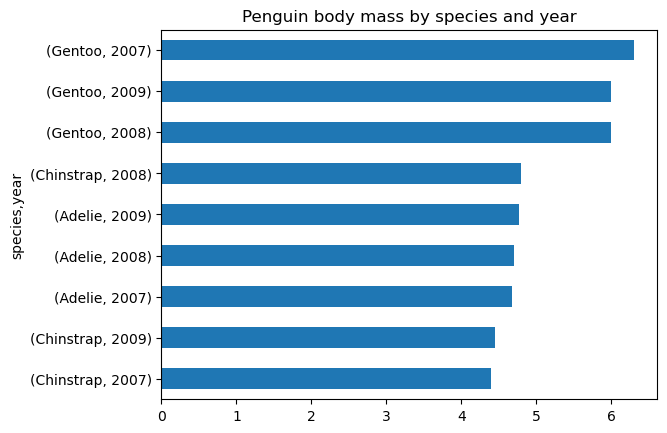

In [34]:
max_mass = (penguins.groupby(["species","year"])
                    .body_mass_kg
                    .max()
                    .rename('max_body_mass')
                    .sort_values(ascending=True)
                    .plot(kind = "barh",
                         title = "Penguin body mass by species and year")
)